In [44]:
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import pybeh_pd as pb
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
#dataset from Loftus & Masson (1994) https://link.springer.com/article/10.3758/BF03210951
mat = np.array([[10, 13, 13],
          [6, 8, 8], 
          [11, 14, 14],
          [22, 23, 25], 
          [16, 18, 20], 
          [15, 17, 17], 
          [1, 1, 4],
          [12, 15, 17],
          [9, 12, 12],
          [8, 9, 12]])

# Table 1

In [46]:
mat_df = pd.DataFrame(mat)
mat_df.columns = ['cond_1', 'cond_2', 'cond_3']
df_table_1 = mat_df.reset_index().rename(columns={'index': 'sub'})
df_table_1['sub'] = df_table_1['sub'] + 1
df_table_1.set_index('sub')

,cond_1,cond_2,cond_3
sub,,,
1,10,13,13
2,6,8,8
3,11,14,14
4,22,23,25
5,16,18,20
6,15,17,17
7,1,1,4
8,12,15,17
9,9,12,12


In [47]:
df_table_1[['cond_1', 'cond_2', 'cond_3']].mean(axis=0) #table 1

cond_1    11.0
cond_2    13.0
cond_3    14.2
dtype: float64

In [48]:
#turn into long pandas dataframe so it's more like our traditional datasets
df_long = pd.melt(df_table_1, id_vars='sub', var_name='cond')
df_long

,sub,cond,value
0,1,cond_1,10
1,2,cond_1,6
2,3,cond_1,11
3,4,cond_1,22
4,5,cond_1,16
5,6,cond_1,15
6,7,cond_1,1
7,8,cond_1,12
8,9,cond_1,9
9,10,cond_1,8


In [49]:
n_subs = df_long['sub'].nunique()
n_conds = df_long['cond'].nunique()

# Table 2

In [50]:
M = df_long['value'].mean()
M_S = df_long.groupby(['sub'], as_index=False).agg({'value': 'mean'})
M_C = df_long.groupby(['cond'], as_index=False).agg({'value': 'mean'})
M #grand mean

12.733333333333333

In [51]:
#subject means
M_S

,sub,value
0,1,12.000000
1,2,7.333333
2,3,13.000000
3,4,23.333333
4,5,18.000000
5,6,16.333333
6,7,2.000000
7,8,14.666667
8,9,11.000000
9,10,9.666667


In [52]:
#condition means
M_C

,cond,value
0,cond_1,11.0
1,cond_2,13.0
2,cond_3,14.2


## Table 3

In [53]:
#Table 3
df_table_3 = df_long.copy()
df_table_3['M'] = df_long['value'].mean()
df_table_3['M_S'] = df_long.groupby(['sub'])['value'].transform('mean')
df_table_3['value'] = df_table_3['value'] - df_table_3['M_S'] + df_table_3['M']

In [54]:
df_table_3.pivot_table(values='value', index='sub', columns='cond')

cond,cond_1,cond_2,cond_3
sub,,,
1,10.733333,13.733333,13.733333
2,11.400000,13.400000,13.400000
3,10.733333,13.733333,13.733333
4,11.400000,12.400000,14.400000
5,10.733333,12.733333,14.733333
6,11.400000,13.400000,13.400000
7,11.733333,11.733333,14.733333
8,10.066667,13.066667,15.066667
9,10.733333,13.733333,13.733333


In [55]:
M = df_table_3['value'].mean()
M_S = df_table_3.groupby(['sub']).agg({'value': 'mean'})
M_C = df_table_3.groupby(['cond']).agg({'value': 'mean'})
M

12.73333333333333

In [56]:
M_S

,value
sub,
1,12.733333
2,12.733333
3,12.733333
4,12.733333
5,12.733333
6,12.733333
7,12.733333
8,12.733333
9,12.733333


In [57]:
M_C

,value
cond,
cond_1,11.0
cond_2,13.0
cond_3,14.2


# Full computation

In [58]:
df_a = df_long.copy()
df_a['M'] = df_a['value'].mean()
df_a['M_S'] = df_a.groupby(['sub'])['value'].transform('mean')
df_a['M_C'] = df_a.groupby(['cond'])['value'].transform('mean')
M_C = df_a.groupby(['cond']).agg({'value': 'mean'})['value'].values

#appendix A
# df_a['y_ij'] = ((df_a['value'] + df_a['M'] - df_a['M_S'])
df_a['S_W'] = ((df_a['value'] + df_a['M'] - df_a['M_S'] - df_a['M_C']) ** 2) 

SS_W = df_a['S_W'].sum() #Figure 3

# MS_SxC = df_a['S_W'].mean() #biased estimate
df = (n_subs - 1) * (n_conds - 1) #18, pg.482
MS_SxC = SS_W / df #same as using n - 1 in standard deviation computation

SE = np.sqrt(MS_SxC / n_subs)
tval = sp.stats.t.ppf(0.975, df)
CI = SE * tval # Eq. 2, pg. 482
CI

0.5209332748849111

### Equal Variances

<ErrorbarContainer object of 3 artists>

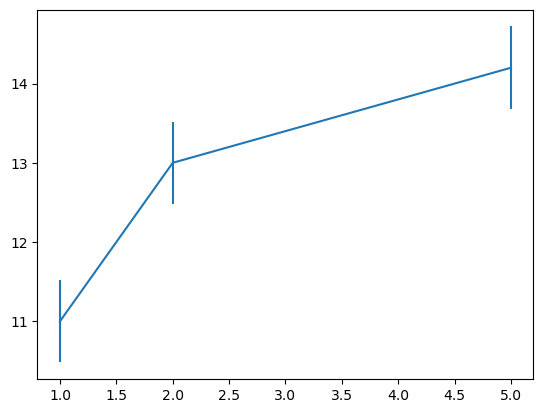

In [16]:
#Figure 5
plt.errorbar(x=[1, 2, 5], y=M_C, yerr=CI)

### Unequal Variances

In [17]:
df_MS = df_a.groupby(['cond', 'M_C'], as_index=False).agg({'S_W': 'sum'})
df_MS['MS_W'] = df_MS['S_W'] / (n_subs - 1)
df_MS['estimator'] = (n_conds / (n_conds - 1)) * (df_MS['MS_W'] - (MS_SxC / (n_conds)))
df_MS['CI'] = np.sqrt(df_MS['estimator'] / n_subs) * sp.stats.t.ppf(0.975, (n_subs-1))

<ErrorbarContainer object of 3 artists>

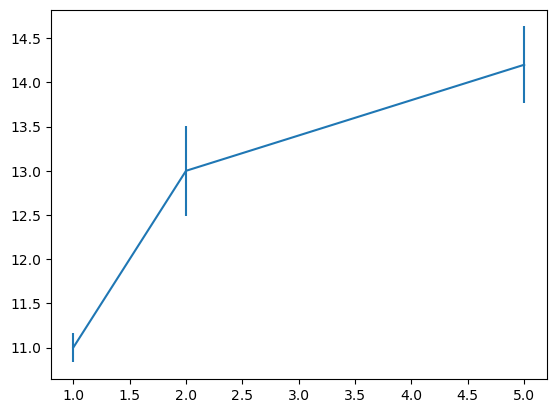

In [18]:
plt.errorbar(x=[1, 2, 5], y='M_C', yerr='CI', data=df_MS)

# Using analytic pybeh function

<ErrorbarContainer object of 3 artists>

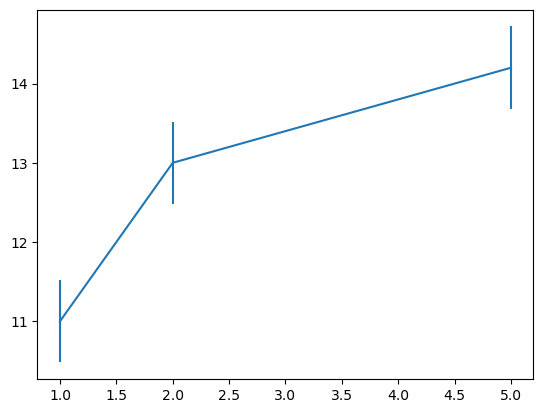

In [19]:
#function requires a column for "subject", "condition" and the "value" for each subject in each condition
df_loftus_masson = pb.loftus_masson_analytic(df_long, 'sub', 'cond', 'value')
plt.errorbar(x=[1, 2, 5], y='M_C', yerr='CI_equal', data=df_loftus_masson)

<ErrorbarContainer object of 3 artists>

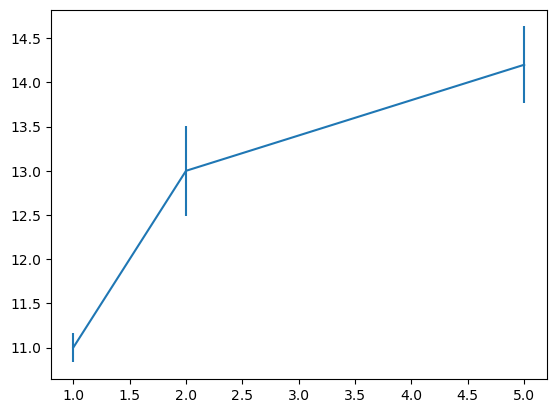

In [20]:
plt.errorbar(x=[1, 2, 5], y='M_C', yerr='CI_unequal', data=df_loftus_masson)

## FR1 SPC example

In [21]:
import cmlreaders as cml
import seaborn as sns

In [22]:
all_fr1_events = cml.CMLReader.load_events(experiments=["FR1"])

In [23]:
word_evs = all_fr1_events.query('type == "WORD"')

In [24]:
spc_sess_df = word_evs.groupby(['subject', 'session', 'serialpos'], as_index=False).agg({'recalled': 'mean'})
spc_df = spc_sess_df.groupby(['subject', 'serialpos'], as_index=False).agg({'recalled': 'mean'})

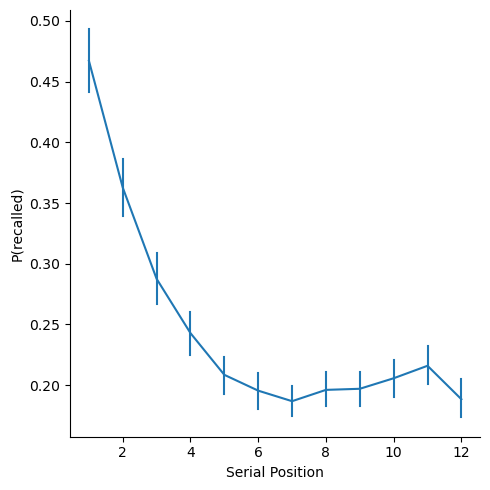

In [25]:
#between-subject errorbars
g = sns.relplot(x='serialpos', y='recalled', data=spc_df, kind='line', err_style="bars")
g.set(xlabel='Serial Position', ylabel='P(recalled)')

<ErrorbarContainer object of 3 artists>

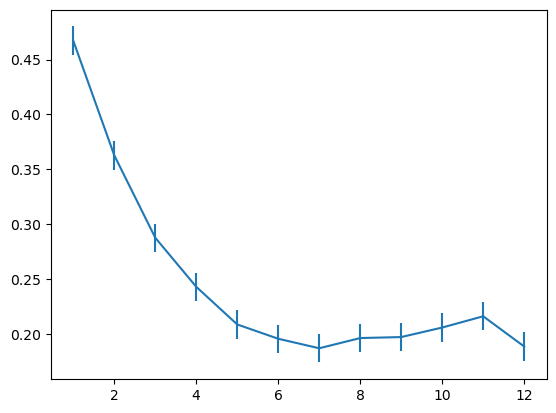

In [26]:
#within-subject errorbars -- notice they are smaller than above
spc_df_loftus_masson = pb.loftus_masson_analytic(spc_df, 'subject', 'serialpos', 'recalled')
plt.errorbar(x='serialpos', y='M_C', yerr='CI_equal', data=spc_df_loftus_masson)

<ErrorbarContainer object of 3 artists>

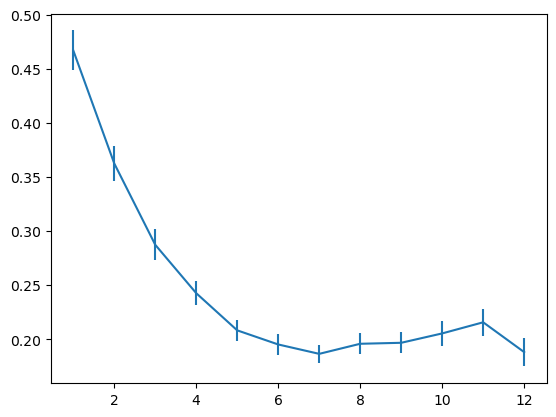

In [27]:
plt.errorbar(x='serialpos', y='M_C', yerr='CI_unequal', data=spc_df_loftus_masson)

# Coussineau Method

In [28]:
#for ease of plotting
df_long['time'] = 1
df_long.loc[df_long['cond'] == 'cond_2', 'time'] = 2
df_long.loc[df_long['cond'] == 'cond_3', 'time'] = 5

In [29]:
df_coussineau = df_long.copy()
df_coussineau['M'] = df_long['value'].mean()
df_coussineau['M_S'] = df_long.groupby('sub')['value'].transform('mean')
df_coussineau['adj_value'] = df_coussineau['value'] + df_coussineau['M'] - df_coussineau['M_S']

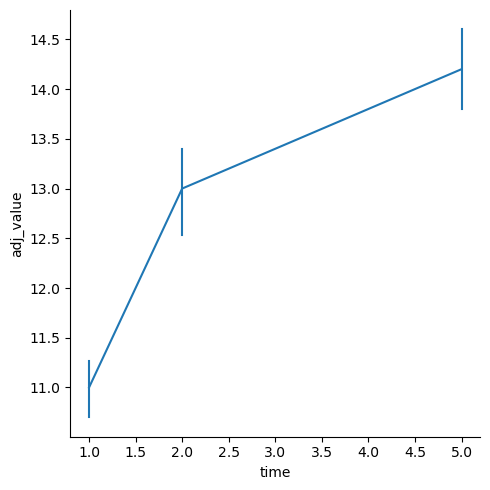

In [30]:
sns.relplot(x='time', y='adj_value', data=df_coussineau, kind='line', err_style="bars")

## Morey/Coussineau/O'Brien adjustment

In [31]:
df_coussineau['cmo_adj_value'] = (np.sqrt(n_conds / (n_conds - 1)) * (df_coussineau['value'] - df_coussineau['M_S'])) + df_coussineau['M']

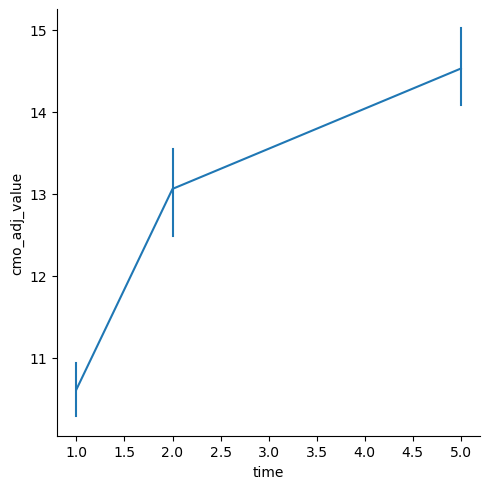

In [32]:
sns.relplot(x='time', y='cmo_adj_value', data=df_coussineau, kind='line', err_style="bars")

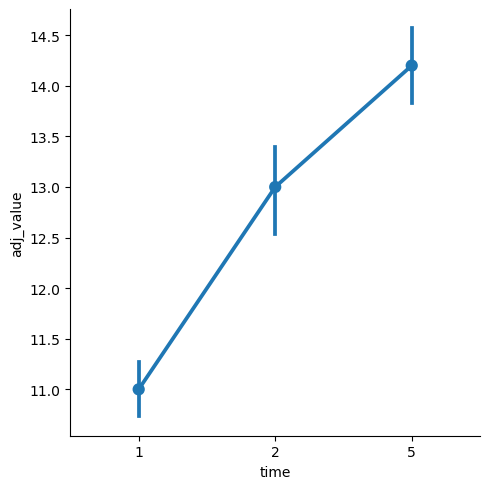

In [39]:
# using units with catplot should solve the same problem by adjusting the bootstrap procedure
# https://seaborn.pydata.org/generated/seaborn.catplot.html
# https://github.com/mwaskom/seaborn/issues/2769
# ideally will be on correct axis but currently only implemented for scatter plots (see below)
g = sns.catplot(x='time', y='adj_value', data=df_coussineau, units='sub', kind='point')

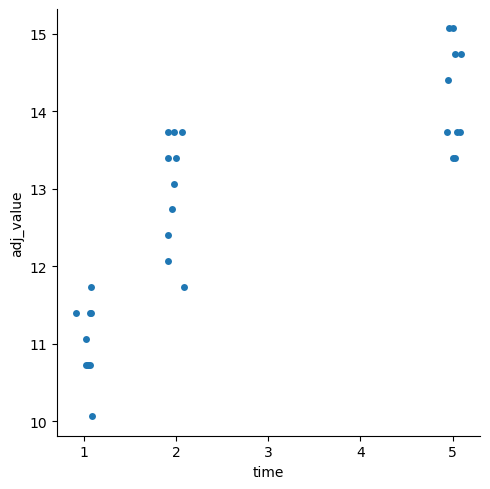

In [40]:
g = sns.catplot(x='time', y='adj_value', data=df_coussineau, units='sub', native_scale=True)

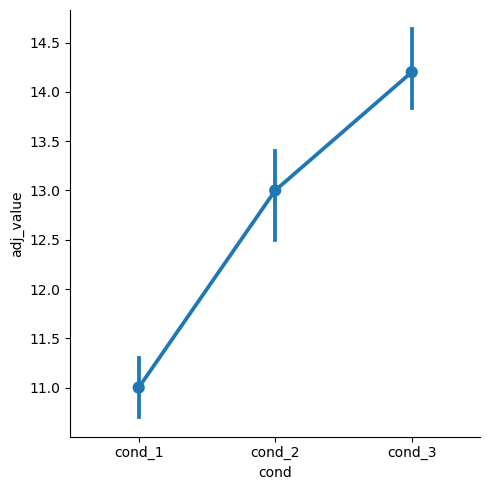

In [65]:
#using pybeh_pd
df_coussineau = pb.coussineau(df_long, 'sub', 'cond', 'value')
g = sns.catplot(x='cond', y='adj_value', data=df_coussineau, units='sub', kind='point')

## FR1 example

In [66]:
df_coussineau = pb.coussineau(spc_df, 'subject', 'serialpos', 'recalled')

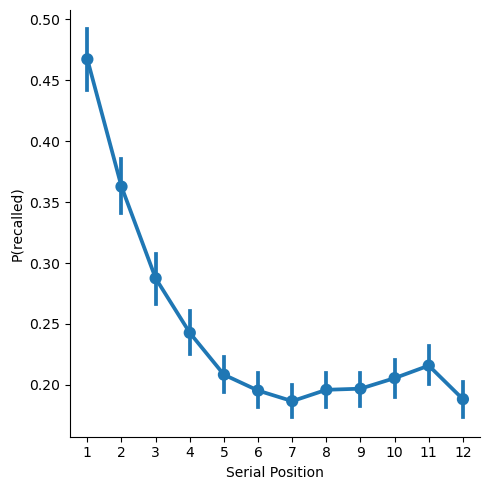

In [68]:
g = sns.catplot(x='serialpos', y='recalled', data=df_coussineau, kind='point', units='subject')
g.set(xlabel='Serial Position', ylabel='P(recalled)')

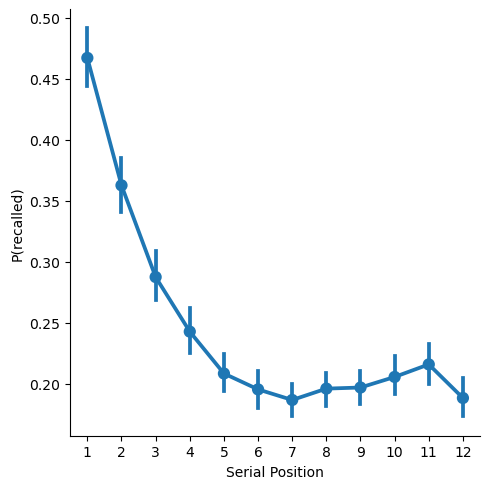

In [70]:
#notice error bars are slightly smaller when not doing the correction (and runs faster)
g = sns.catplot(x='serialpos', y='recalled', data=df_coussineau, kind='point')
g.set(xlabel='Serial Position', ylabel='P(recalled)')

# Within-list analyses

Sometimes we are actually interested in visualizing functions within *list* and not just within subject. In this case, we can apply the same logic from Coussineau to normalize within list. We then average these to get the average within-list function for each subject (because we assume most of the variance is within subject). The same procedure can then be used as if these were the subject scores. This will make less of a difference for binary measures (like recalled or not) but potentially relevant for continuous measures like RTs or neural indices

First we need to preprocess the FR1 data

In [103]:
events = all_fr1_events.query('type == ["WORD", "REC_WORD"]')
events = events.assign(row_order=range(len(events)))
events = events[events['list'] > 0] # removing practice lists

#removing subjects who were presented with the same word multiple times (probably repeated data)
word_evs = events.query('type == "WORD"')
n_word_pres = word_evs.groupby(['subject', 'session', 'list', 'item_num'], as_index=False).size()
bad_lists = n_word_pres.query('size >= 2')
bad_subs = bad_lists.subject.unique().tolist()

#drop subjects without 12 items per list
n_list_pres = word_evs.groupby(['subject', 'session', 'list'], as_index=False).size()
bad_lists = n_list_pres.query('size != 12')
bad_subs += bad_lists.subject.unique().tolist()

#drop subjects with no recalls
n_types = events.groupby('subject', as_index=False).agg({'type': 'nunique'})
no_recall_subs = n_types.query('type != 2')
bad_subs += no_recall_subs.subject.unique().tolist()

#drop subs with messed up recalls
rec_evs = events.query('type == "REC_WORD"')
joint_evs = word_evs.merge(rec_evs[['subject', 'session', 'list', 'item_name']], how='left', indicator=True)
bad_subs += joint_evs.query('(recalled == 1 and _merge != "both") or (recalled == 0 and _merge == "both")').subject.unique().tolist()

events.query('subject not in @bad_subs', inplace=True)

In [104]:
#fixing serial position in REC_WORD events
events.loc[events['type'] == "REC_WORD", "serialpos"] = np.nan
events.sort_values('type', inplace=True)
#bfill because WORD will come after REC_WORD after sorting
events['serialpos'] = events.groupby(['subject', 'session', 'list', 'item_name'])['serialpos'].bfill()
events.sort_values('row_order', inplace=True)

In [105]:
word_evs = events.query('type == "WORD"')
rec_evs = events.query('type == "REC_WORD"')

In [106]:
# loading rec evs
rec_evs = events.query('type == "REC_WORD"')
rec_evs['repeat'] = rec_evs.duplicated(subset=['subject', 'session', 'list', 'item_name'])
rec_evs['correct'] = (rec_evs['repeat'] == False) & (rec_evs['intrusion'] == 0)
rec_evs['next_rectime'] = rec_evs.groupby(['subject', 'session', 'list']).rectime.shift(-1)
rec_evs['next_correct'] = rec_evs.groupby(['subject', 'session', 'list']).correct.shift(-1)
rec_evs['irt'] = rec_evs['next_rectime'] - rec_evs['rectime']
rec_evs.loc[(rec_evs['correct'] == False) | (rec_evs['next_correct'] == False), 'irt'] = np.nan
rec_evs['correct_outpos'] = rec_evs.groupby(['subject', 'session', 'list'])['correct'].cumsum()
rec_evs['n_correct'] = rec_evs.groupby(['subject', 'session', 'list'])['correct_outpos'].transform('max')
rec_evs['irt_s'] = rec_evs['irt'] / 1000
rec_evs['next_serialpos'] = rec_evs.groupby(['subject', 'session', 'list']).serialpos.shift(-1)
rec_evs['transition'] = rec_evs['next_serialpos'] - rec_evs['serialpos']
rec_evs.loc[(rec_evs['correct'] == False) | (rec_evs['next_correct'] == False), 'transition'] = np.nan
rec_evs['next_item_name'] = rec_evs.groupby(['subject', 'session', 'list']).item_name.shift(-1)

/home1/djhalp/.conda/envs/cml/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home1/djhalp/.conda/envs/cml/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home1/djhalp/.conda/envs/cml/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set 

Standard between-subjects error bars

In [107]:
crl_sess_df = rec_evs.groupby(['subject', 'session', 'transition'], as_index=False).agg({'irt_s': 'mean'})
crl_df = crl_sess_df.groupby(['subject', 'transition'], as_index=False).agg({'irt_s': 'mean'})

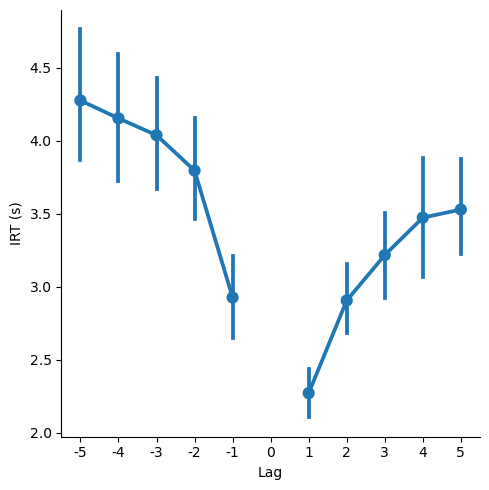

In [110]:
g = sns.catplot(x='transition', y='irt_s', data=crl_df.query('abs(transition) < 6'),
                order=np.arange(-5, 6),
                kind='point')
g.set(xlabel='Lag', ylabel='IRT (s)')

Coussineau within-subject error bars

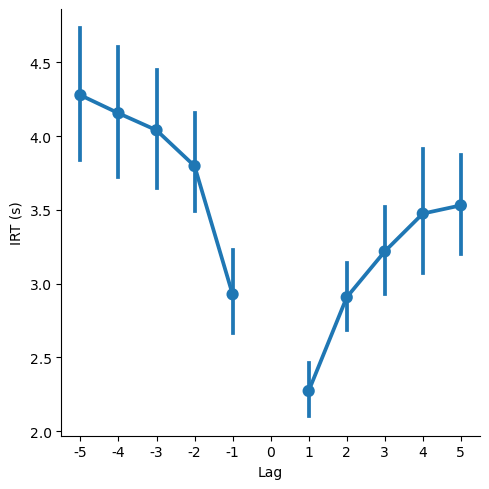

In [115]:
crl_df_coussineau = pb.coussineau(crl_df.query('abs(transition) < 6'), 'subject', 'transition', 'irt_s')
g = sns.catplot(x='transition', y='irt_s', data=crl_df_coussineau, kind='point', order=np.arange(-5, 6), units='subject')
g.set(xlabel='Lag', ylabel='IRT (s)')

Coussineau within-list error bars

In [117]:
# first average irts within transition type within each list
crl_list_df = rec_evs.groupby(['transition', 'subject', 'session', 'list'], as_index=False).agg({'irt_s': 'mean'})

In [118]:
# normalize irts within each list
crl_list_df_cossineau = pb.coussineau(crl_list_df.query('abs(transition) < 6'), ['subject', 'session', 'list'], 'transition', 'irt_s')

In [119]:
# average within session
crl_within_list_sess_df_cossineau = crl_list_df_cossineau.groupby(['subject', 'session', 'transition'], as_index=False).agg({'adj_irt_s': 'mean'})
# average within subject
crl_within_list_df_cossineau = crl_within_list_sess_df_cossineau.groupby(['subject', 'transition'], as_index=False).agg({'adj_irt_s': 'mean'})

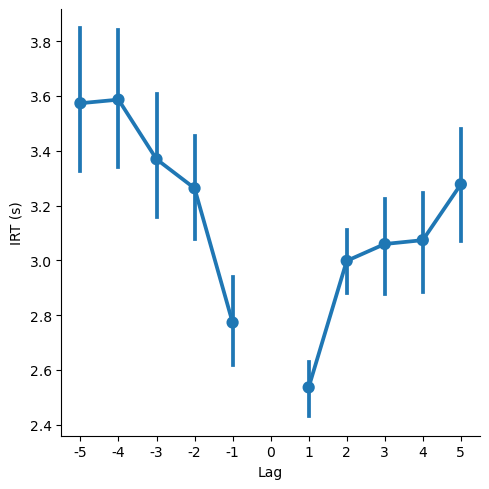

In [120]:
g = sns.catplot(x='transition', y='adj_irt_s', data=crl_within_list_df_cossineau, 
                kind='point', order=np.arange(-5, 6), units='subject')
g.set(xlabel='Lag', ylabel='IRT (s)')